Universidad Regional Amazonica Ikiam 

Por: Maria Jose Auquilla Villamagua 

In [5]:
import re
import csv
import itertools

In [6]:
with open('./sample_data/pubmed-canabissat-set.txt', encoding="utf8") as f:
    my_text = f.read()

In [7]:
#my_text

In [8]:
len(my_text)

2304340

In [9]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

In [10]:
print(my_text[:2000])

PMID- 31084880
OWN - NLM
STAT- MEDLINE
DCOM- 20190606
LR  - 20200930
IS  - 1873-2259 (Electronic)
IS  - 0168-9452 (Linking)
VI  - 284
DP  - 2019 Jul
TI  - Terpenes in Cannabis sativa - From plant genome to humans.
PG  - 67-72
LID - S0168-9452(19)30119-0 [pii]
LID - 10.1016/j.plantsci.2019.03.022 [doi]
AB  - Cannabis sativa (cannabis) produces a resin that is valued for its psychoactive and  medicinal properties. Despite being the foundation of a multi-billion dollar global  industry, scientific knowledge and research on cannabis is lagging behind compared  to other high-value crops. This is largely due to legal restrictions that have  prevented many researchers from studying cannabis, its products, and their effects  in humans. Cannabis resin contains hundreds of different terpene and cannabinoid  metabolites. Many of these metabolites have not been conclusively identified. Our  understanding of the genomic and biosynthetic systems of these metabolites in  cannabis, and the factors tha

In [11]:
zipcodes = re.findall(r'AD.+, (.+[a-z-A-Z]).  ?Electronic|AD.+, (.+[a-z-A-Z]).  [^\s<>"]+@[^\s<>"]+|AD.+, (.+[a-z-A-Z]). [^\s<>"]+@[^\s<>"]+|AD.+,  ?(.+[a-z-A-Z]).?|', my_text)

flat_list = itertools.chain(*zipcodes)
flat_list=list(flat_list)
flat_list

resultantList = [] 
for element in flat_list:
    if element not in resultantList:
        resultantList.append(element)

resultantList[:20]

['',
 'Canada',
 'France',
 'Germany',
 'UK',
 'Spain',
 'Leuven Belgium',
 'Norway',
 'Italy',
 'USA',
 'Paris',
 'Belgium',
 'Espana',
 "Evelina London Children's Hospital",
 'The Netherlands',
 'Finland',
 'Israel',
 'Poland',
 'Switzerland',
 'Genova']

In [12]:
len(resultantList)

231

In [14]:
unique_zipcodes = list(set(resultantList))
unique_zipcodes.sort()
unique_zipcodes[:10]

['',
 ' Argentina',
 ' Australi',
 ' Australia',
 ' CO',
 ' Canada',
 ' Ireland',
 ' Italy',
 ' Luxembourg',
 ' Norway']

In [15]:
len(unique_zipcodes)

231

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('./sample_data/countries.csv', engine='python', skipfooter=3)
data.head(5)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [18]:
data_name = data[data.name.isin(resultantList)]
data_name.head(10)

,country,latitude,longitude,name
10,AR,-38.416097,-63.616672,Argentina
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
16,BA,43.915886,17.679076,Bosnia and Herzegovina
19,BE,50.503887,4.469936,Belgium
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
40,CH,46.818188,8.227512,Switzerland
43,CL,-35.675147,-71.542969,Chile
45,CN,35.861660,104.195397,China


In [19]:
len(data_name)

58

In [20]:
data_country = data[data.country.isin(resultantList)]
data_country.head(20)

,country,latitude,longitude,name
35,CA,56.130366,-106.346771,Canada
46,CO,4.570868,-74.297333,Colombia
53,DE,51.165691,10.451526,Germany
100,IL,31.046051,34.851612,Israel
134,MA,31.791702,-7.092620,Morocco
136,MD,47.411631,28.369885,Moldova
144,MO,22.198745,113.543873,Macau
157,NC,-20.904305,165.618042,New Caledonia
169,PA,8.537981,-80.782127,Panama
227,US,37.090240,-95.712891,United States


In [21]:
len(data_country)

10

In [23]:
import pandas as pd 
all_data =pd.concat([data_name,data_country]).drop_duplicates().sort_values('name')

In [24]:
len(all_data)

62

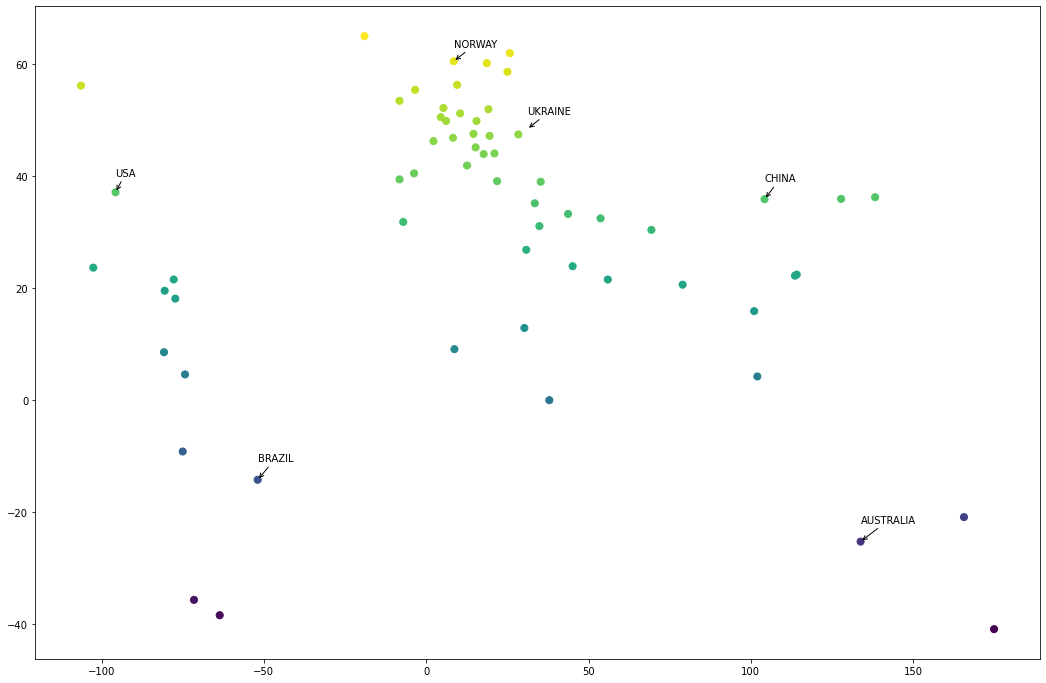

In [25]:
import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)


ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

#USA UK BRASIL CHINA AUSTRALIA NORWAY